In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("chd-201015-202131.csv")

df.head()

,Obs,ID,AGE,agrp,CHD
0,1,1,20,1,0
1,2,2,23,1,0
2,3,3,24,1,0
3,4,4,25,1,0
4,5,5,25,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Obs     100 non-null    int64
 1   ID      100 non-null    int64
 2   AGE     100 non-null    int64
 3   agrp    100 non-null    int64
 4   CHD     100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [11]:
# Missing values check
df.isnull().sum()

Obs     0
ID      0
AGE     0
agrp    0
CHD     0
dtype: int64

In [5]:
# Handle missing values using mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [8]:
X = df.drop('CHD', axis=1)   # Features
y = df['CHD']               # Target


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6


In [14]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[8 3]
 [5 4]]


In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



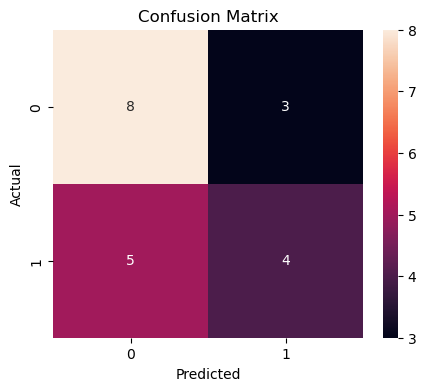

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


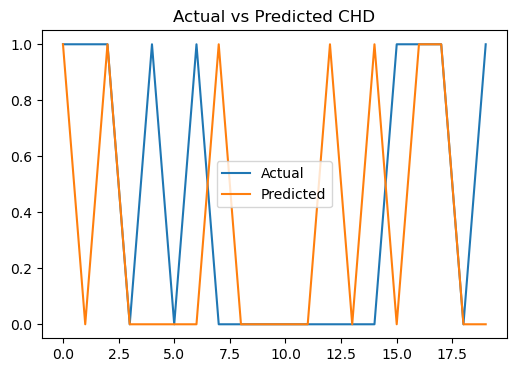

In [17]:
plt.figure(figsize=(6,4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted CHD")
plt.show()


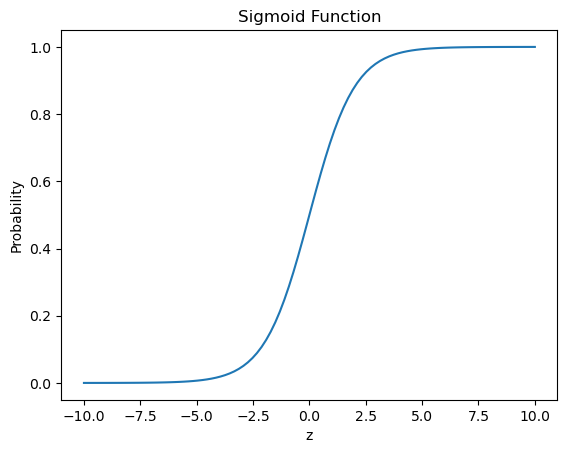

In [18]:
import numpy as np

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.xlabel("z")
plt.ylabel("Probability")
plt.title("Sigmoid Function")
plt.show()
